20211108 Donghyuk Jung

# Conjugate Gradient method


1. Implement linear Conjugate Gradient method for the following function

- $f(x,y)=(x+2y-7)^2+(2x+y-5)^2$


2. Implement nonlinear Conjugate Gradient method for the following function

- $f(x,y)=40(y-x^2)^2+(1-x)^2$
- $f(x,y)=(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2$

# Common funtion implementation

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.tri as tri 
import math as m
import time as t
from tabulate import tabulate

In [3]:
def f_1(p):
    x, y = p[0][0], p[1][0]
    return (x+2*y-7)**2+(2*x+y-5)**2


def f_2(p):
    x, y = p[0][0], p[1][0]
    return 40*(y-x**2)**2+(1-x)**2


def f_3(p):
    x, y = p[0][0], p[1][0]
    return (1.5-x+x*y)*2+(2.25-x+x*(y**2))**2+(2.625-x+x*(y**3))**2


In [4]:
def plotContour(f, rangeX=(0, 0), rangeY=(0, 0), grid=(0, 0)):
    x = np.arange(*rangeX, 0.01)
    y = np.arange(*rangeY, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(([X], [Y]))
    plt.figure(figsize=grid)
    cp = plt.contour(X, Y, Z, levels=np.linspace(
        Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 120), linewidths=0.1)  # plt.colorbar(cp)


def plotLine(x1, x2, color="black"):
    plt.plot([x1[0], x2[0]], [x1[1], x2[1]], color, linewidth=.8)


def plotPoint(x, color="black"):
    plt.plot([x[0]], [x[1]], color, marker='o', markersize=4)


def plotText(x, str=None):
    plt.plot([x[0]], [x[1]], "black", marker='o', markersize=4)
    if str != None:
        plt.text(x[0]+.03, x[1]+.03, str, fontsize=20)
    else:
        plt.text(x[0]+.03, x[1]+.03, "(%.3f, %.3f)" % x, fontsize=20)


In [5]:
def resultsInTable(x, f):
    print("\n%s results at (%.2f, %.2f) " % (f.__name__, x.T[0][0], x.T[0][1]))
    plotText(x, "x0")
    cgfr = nonLinearCG(x, f, CG_FR, color='red')
    cgpr = nonLinearCG(x, f, CG_PR, color='blue')
    cghs = nonLinearCG(x, f, CG_HS, color='green')
    print(tabulate([["CG-FR", *cgfr], ["CG-PR", *cgpr], ["CG-HS", *cghs]], headers=[
          "f(x)", "x", "iter", "time"], tablefmt="github", floatfmt=(".5f", ".5f"),stralign="center",numalign="center"))
    return


def printVal(xk, f, iter, start):
    return "%.8f" % f(xk), "(%.8f, %.8f)" % (xk.T[0][0], xk.T[0][1]), iter, "%4.2f" % ((t.time()-start)*1000)


# Linear Conjugate Gradient method

Linear conjuage gradient method use relation between two problem

- Solving linear system $\bold{Ax}=\bold{b}\Leftrightarrow$ Solving mizimize problem $\rm{arg\,min} \left\{ \frac{1}{2}\bold{x}^T \bold{A}\bold{x}-\bold{b}^T\bold{x} \right\}$

Let the observation function $f( \bold{x} )=\frac{1}{2}\bold{x}^T \bold{A}\bold{x}-\bold{b}^T\bold{x}$, then $\nabla f( \bold{x} )=\bold{Ax}-\bold{b}$

$f(x)$ has optimal point $\bold{x}^*$ where $\nabla f( \bold{x}^* )=0$

Find the quadratic form of $f(x,y)=(x+2y-7)^2+(2x+y-5)^2$ 
$$\begin{split} 
f(x,y)&=(x+2y-7)^2+(2x+y-5)^2 \\
&=5x^2+8xy+5y^2-34x-38y+74\\
&=\frac{1}{2}\begin{bmatrix}x & y\end{bmatrix} \begin{bmatrix}a&b\\ b&c\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix}+\begin{bmatrix}d&e\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix}+f\\
&\therefore a=10, b=8, c=10, d=-34, e=-38, f=74\\
&\Leftrightarrow \rm{arg\,min} \left\{\frac{1}{2}\bold{x}^T \bold{A}\bold{x}-\bold{b}^T\bold{x}+f\right\} \\
&= \rm{arg\,min} \left\{\frac{1}{2}\bold{x}^T \bold{A}\bold{x}-\bold{b}^T\bold{x}\right\} \\
&\therefore \bold{A}=\begin{bmatrix}10&8\\8&10\end{bmatrix}, \quad \bold{b}=\begin{bmatrix}34\\38 \end{bmatrix}\end{split}$$

*since linear CG method use minimization problem, we remove constant term temporary in $f(x,y)$

In [6]:
def linearCG(x0, f=f_1, color='red'):
    iter = 0
    start = t.time()
    A = np.array([[10, 8], [8, 10]])
    b = np.array([[34, 38]]).T

    rk = A.dot(x0)-b
    pk = -rk
    bk = np.array([[0, 0]]).T
    xk = x0
    cnt = 0
    while np.linalg.norm(rk) >1e-4:
        iter += 1
        ak = rk.T.dot(rk)/np.matmul(np.matmul(pk.T, A), pk)
        plotLine(xk, xk+ak*pk, color)
        plotPoint((xk.T[0][0], xk.T[0][1]), color)
        xk = xk+ak*pk
        rk1 = rk+ak*np.matmul(A, pk)

        bk = rk1.T.dot(rk1)/rk.T.dot(rk)
        rk = rk1
        pk = -rk+bk*pk

    return printVal(xk, f, iter, start)


|    init     |  f(x)   |            x             |  iter  |  time  |
|-------------|---------|--------------------------|--------|--------|
| (-1.0, 2.0) | 0.00000 | (1.00000000, 3.00000000) |   2    |  2.57  |
| (-1.2, 5.0) | 0.00000 | (1.00000000, 3.00000000) |   2    |  1.78  |
| (3.0, 5.0)  | 0.00000 | (1.00000000, 3.00000000) |   1    |  0.87  |
| (3.0, 1.1)  | 0.00000 | (1.00000000, 3.00000000) |   2    |  1.8   |


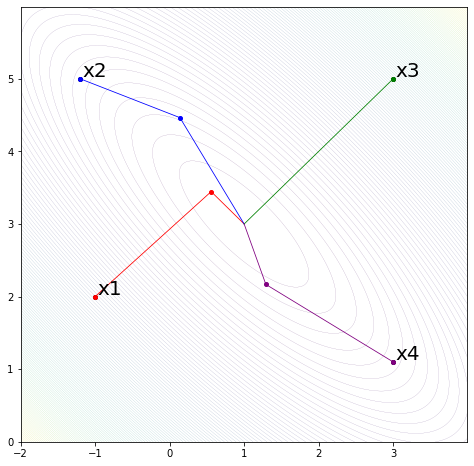

In [14]:
def printpt(x):
    return "(%.1f, %.1f)" % (x.T[0][0], x.T[0][1])


plotContour(f_1, rangeX=(-2, 4), rangeY=(0, 6), grid=(8, 8))
x = np.array([[[-1], [2]], [[-1.2], [5]], [[3], [5]], [[3], [1.1]]])
c = ['red', 'blue', 'green', 'purple']
val = []
for i in range(4):
    plotText(x[i], "x%d" % (i+1))
    lcg = linearCG(x[i], color=c[i])
    val.append([printpt(x[i]), *lcg])
print(tabulate(val, headers=[
    "init", "f(x)", "x", "iter", "time"], tablefmt="github", floatfmt=(".5f", ".5f"), stralign="center", numalign="center"))


Check result with linear system $\bold{Ax}=\bold{b}$

In [20]:
A = np.array([[10, 8], [8, 10]])
b = np.array([[34, 38]]).T
x = np.array([[1, 3]]).T

bb = np.matmul(A, x)
print("Ax=b")
print("b=(%.1f, %.1f)" % (bb.T[0][0], bb.T[0][1]))

Ax=b
b=(34.0, 38.0)


# Non-linear Conjugate Gradient method

In [8]:
h = 1e-7


def grad(p, f):
    dx = np.array([[[-h], [0]], [[h], [0]]])
    dy = np.array([[[0], [-h]], [[0], [h]]])
    g1 = (f(p+dx[1])-f(p+dx[0]))/(2*h)
    g2 = (f(p+dy[1])-f(p+dy[0]))/(2*h)
    return np.array([[g1], [g2]])


In [9]:
def stepLength(x0, p, f):  # Use backtrakingMethod
    a, r, c = 3, 0.9, 0.6
    while f(x0+a*p) > a*c*np.dot(grad(x0, f).T, p)+f(x0):
        a *= r
    return a


In [10]:
def CG_FR(df1,df,pk,f): # Flectcher-Reeves
    return df1.T.dot(df1)/df.T.dot(df)
def CG_PR(df1,df,pk,f): # Polak-Ribiere
    return df1.T.dot(df1-df)/df.T.dot(df)
def CG_HS(df1,df,pk,f): # Hestenes-Stiefel
    return df1.T.dot(df1-df)/(df1-df).T.dot(pk)

In [11]:
def nonLinearCG(x0, f, beta, color='black'):
    start = t.time()
    df = grad(x0, f)
    pk = -df
    bk = np.array([[0, 0]]).T
    xk = x0
    iter = 0
    while np.linalg.norm(df) > 1e-4:
        iter += 1
        ak = stepLength(xk, pk, f)
        plotLine(xk, xk+ak*pk, color)
        plotPoint((xk.T[0][0], xk.T[0][1]), color)
        xk1 = xk+ak*pk
        df1 = grad(xk1, f)
        bk = beta(df1, df, pk, f)
        pk = -df1+bk*pk
        xk,df = xk1,df1
    return printVal(xk, f, iter, start)



f_2 results at (1.20, 1.20) 
|       |  f(x)   |            x             |  iter  |  time  |
|-------|---------|--------------------------|--------|--------|
| CG-FR | 0.00000 | (1.00005897, 1.00011874) |   20   | 70.17  |
| CG-PR | 0.00000 | (1.00002044, 1.00004097) |   27   | 96.77  |
| CG-HS | 0.00000 | (1.00002180, 1.00004348) |   23   | 95.92  |


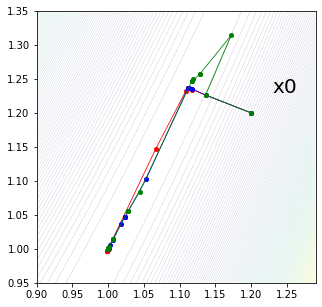

In [12]:
x0 = np.array([[1.2, 1.2]]).T

plotContour(f_2, rangeX=(0.9, 1.3), rangeY=(0.95, 1.35), grid=(5,5))
resultsInTable(x0.copy(), f_2)


f_3 results at (1.20, 1.20) 
|       |   f(x)   |             x             |  iter  |  time  |
|-------|----------|---------------------------|--------|--------|
| CG-FR | -5.73452 | (3.35003123, -0.54359099) |   54   | 163.14 |
| CG-PR | -5.73452 | (3.35000673, -0.54359075) |   19   | 47.71  |
| CG-HS | -5.73452 | (3.35000916, -0.54359129) |   21   | 50.27  |


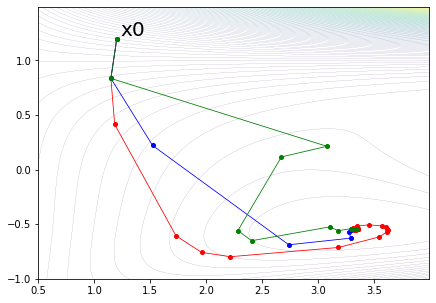

In [13]:
plotContour(f_3, rangeX=(0.5, 4.0), rangeY=(-1, 1.5), grid=(7, 5))
resultsInTable(x0.copy(), f_3)
